# PD-regulation

$l_{crit} = \text{const}$ and $dt_{\text{update action}} = \text{const}$, so 

$$
    \begin{aligned}
        & \frac{dx_{jet}}{dt} = v_{jet} \\
        & \frac{dx^{rel}_{jet}}{dt} = v^{rel}_{jet} \\
    \end{aligned}
$$

Error $e=(1-x^{rel}_{jet})$, then

$$
    \frac{de}{dt} = - v^{rel}_{jet}
$$

In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt

from datetime import datetime

from src.scenario import SimulationScenario
from src.system import HydraulicSystem
from src.simulator import Simulator
from src.policy import PDController

data_path = './data'
os.path.isdir(data_path)

True

Time start: 2024-03-27_122643
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

SEED = 1
Total objective: 2.18107
log folder: ./data/2024-03-27_122643_seed_1


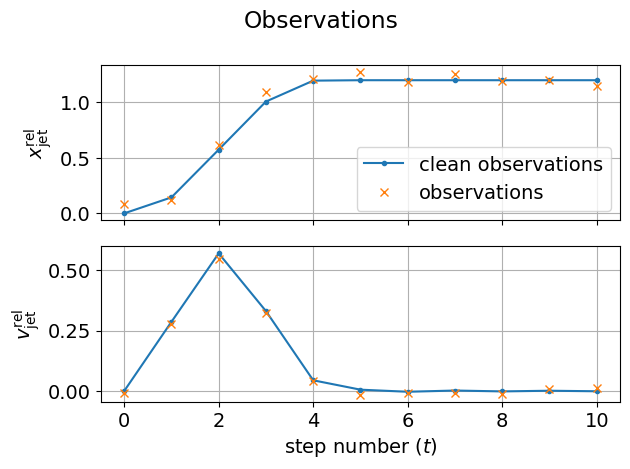

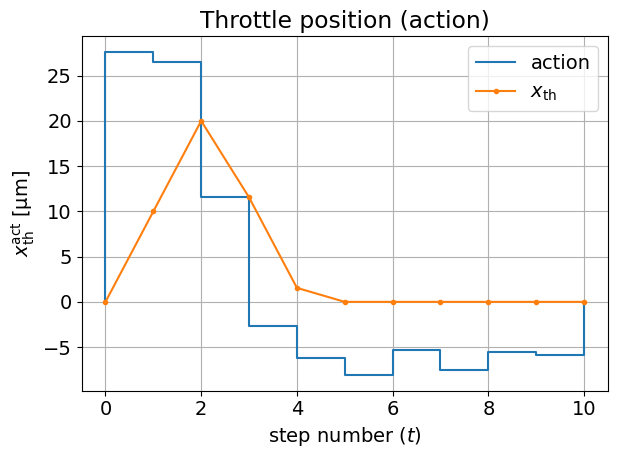


SEED = 2
Total objective: 2.94602
log folder: ./data/2024-03-27_122643_seed_2


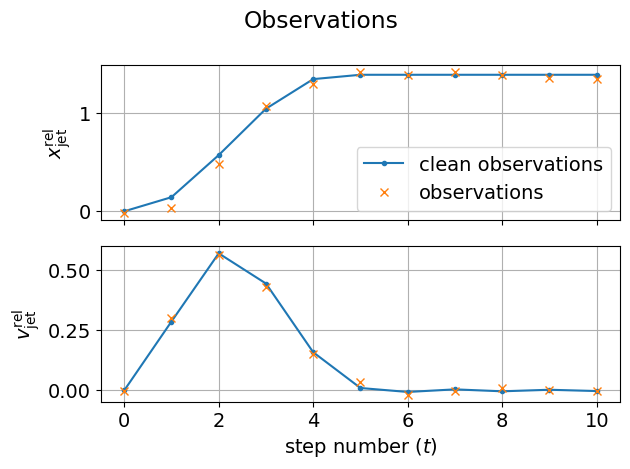

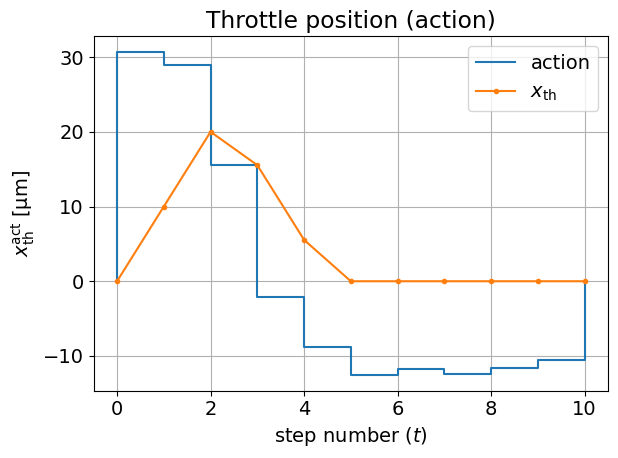


SEED = 3
Total objective: 2.41955
log folder: ./data/2024-03-27_122643_seed_3


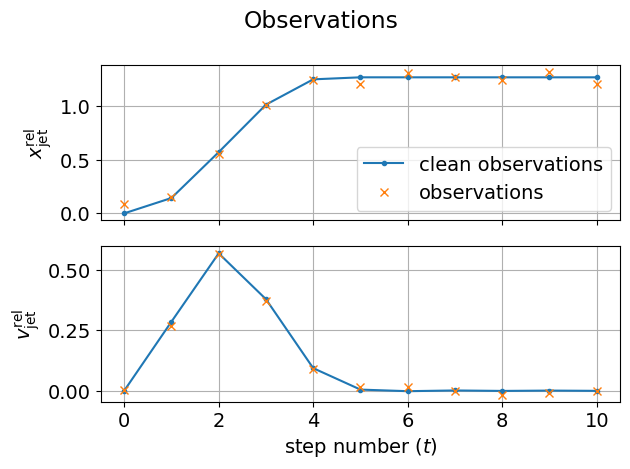

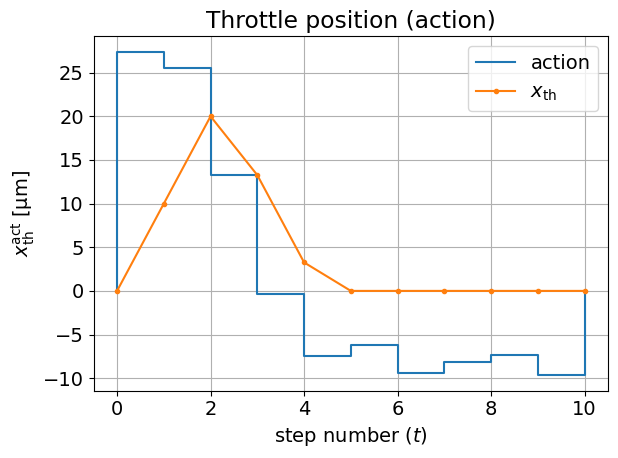


SEED = 4
Total objective: 2.44941
log folder: ./data/2024-03-27_122643_seed_4


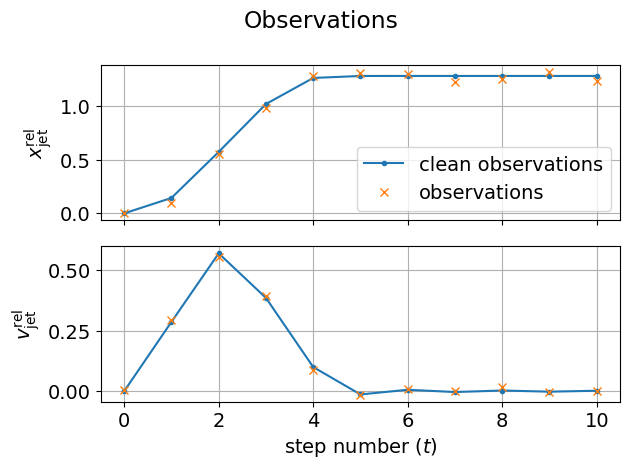

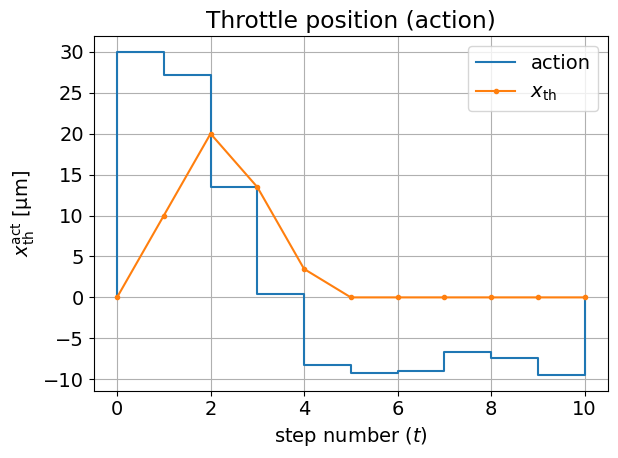


SEED = 5
Total objective: 2.31754
log folder: ./data/2024-03-27_122643_seed_5


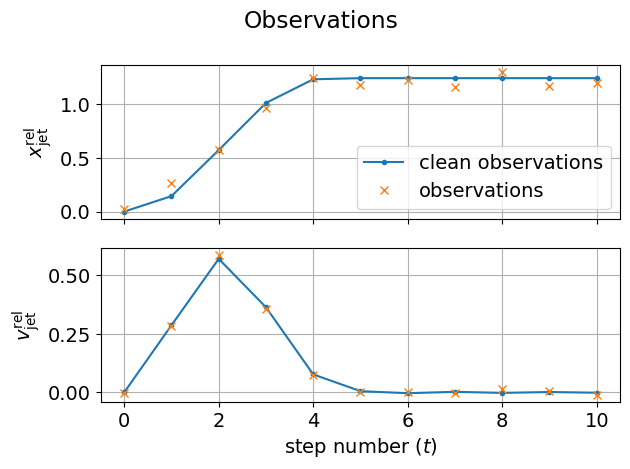

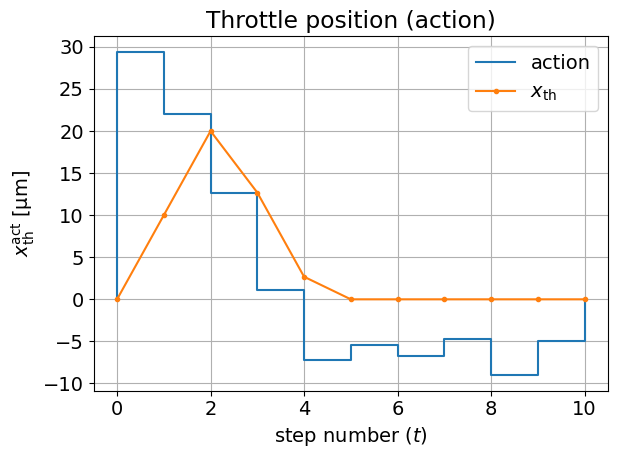


SEED = 6
Total objective: 3.28104
log folder: ./data/2024-03-27_122643_seed_6


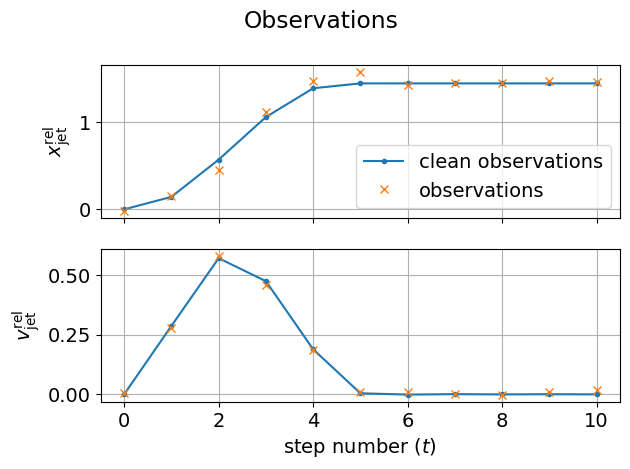

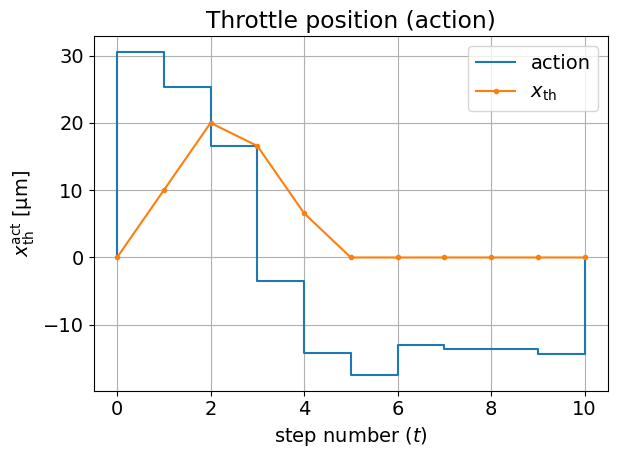


SEED = 7
Total objective: 2.55425
log folder: ./data/2024-03-27_122643_seed_7


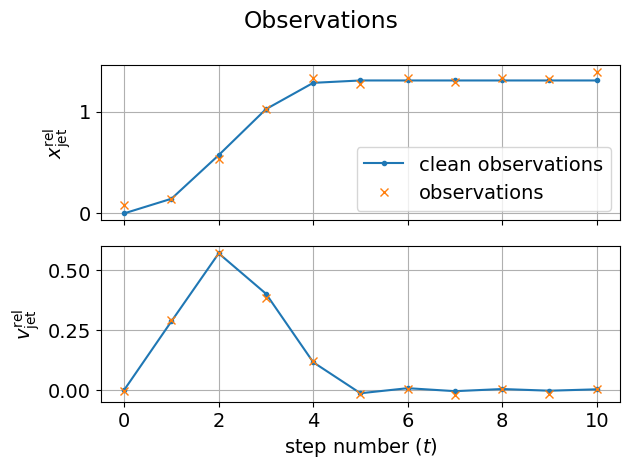

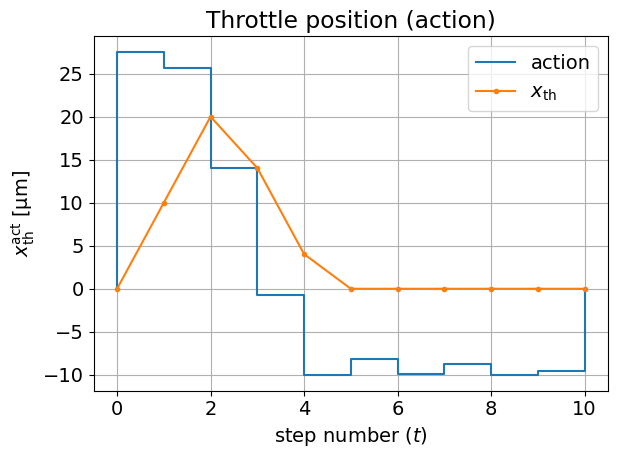


SEED = 8
Total objective: 3.20291
log folder: ./data/2024-03-27_122643_seed_8


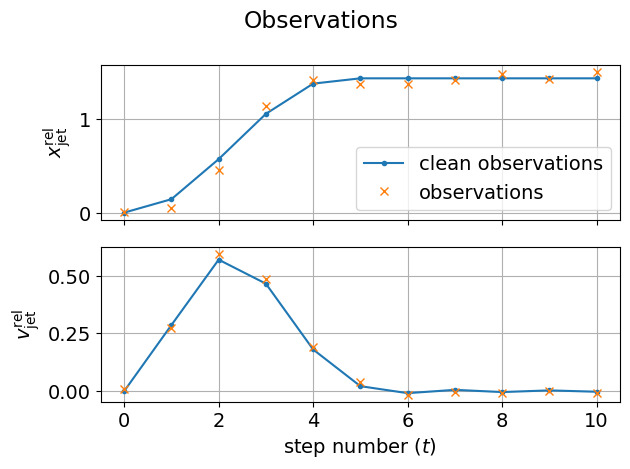

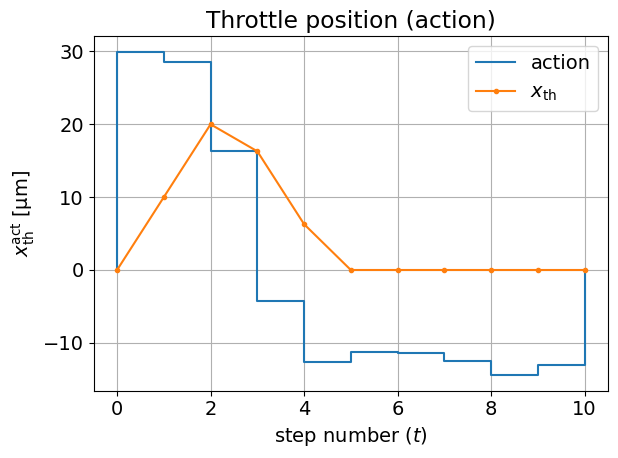


SEED = 9
Total objective: 2.43495
log folder: ./data/2024-03-27_122643_seed_9


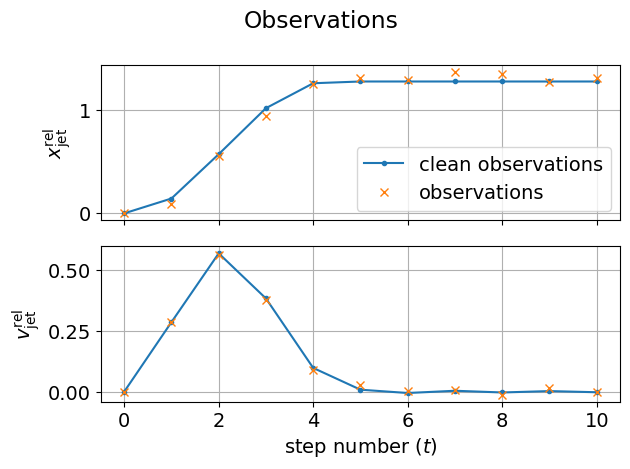

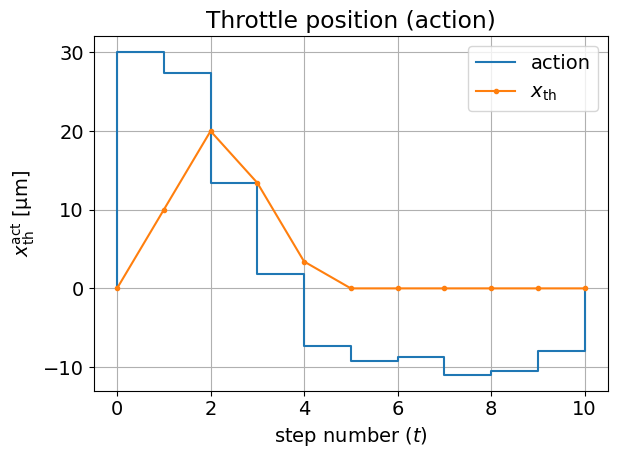


SEED = 10
Total objective: 2.21876
log folder: ./data/2024-03-27_122643_seed_10


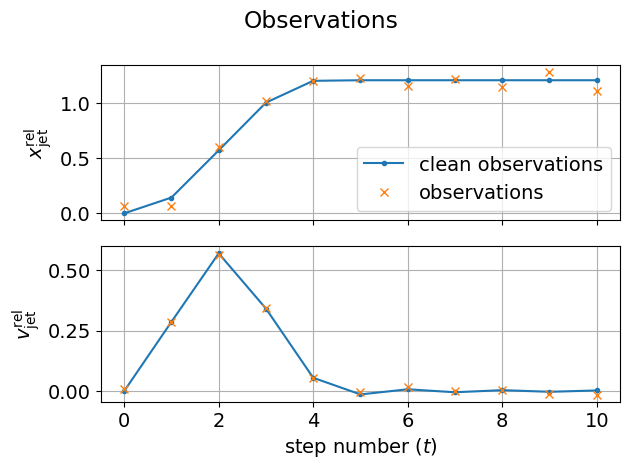

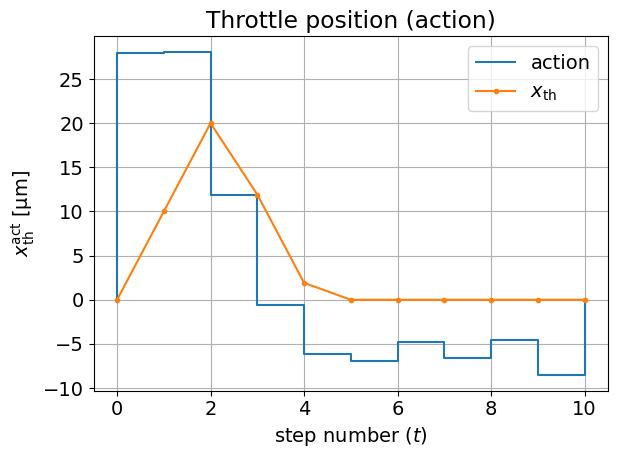


SEED = 11
Total objective: 2.34430
log folder: ./data/2024-03-27_122643_seed_11


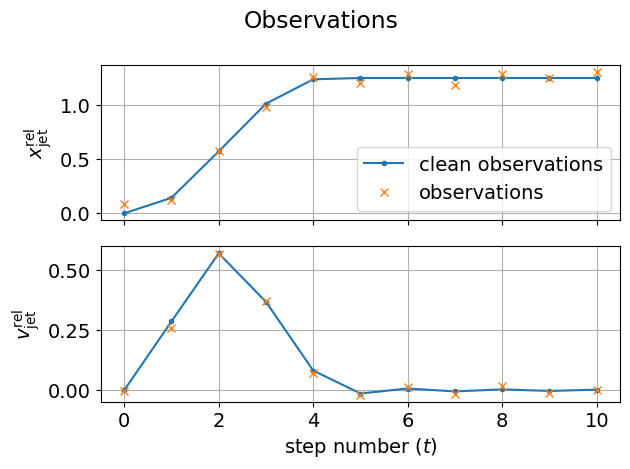

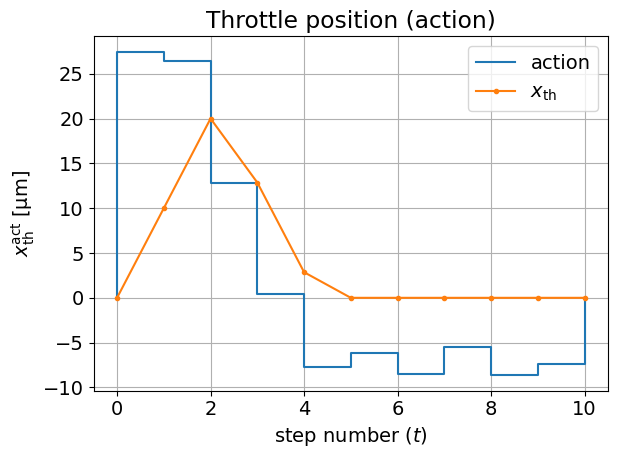


SEED = 12
Total objective: 2.19759
log folder: ./data/2024-03-27_122643_seed_12


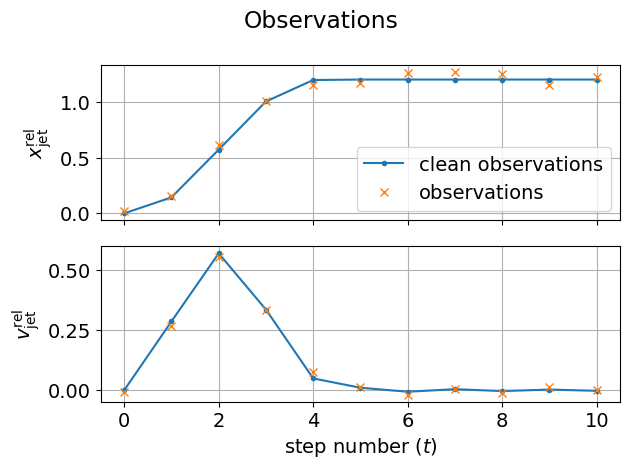

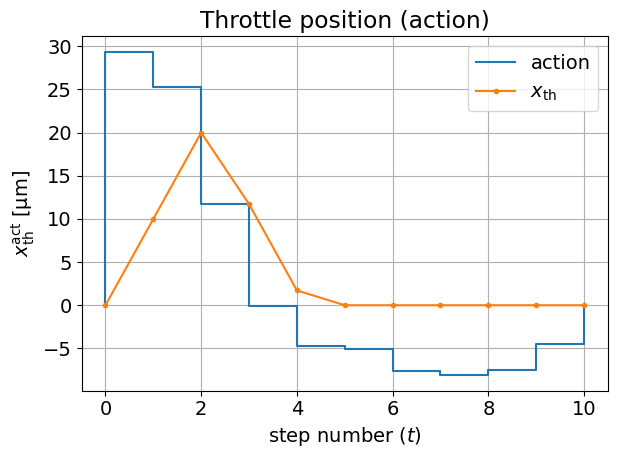


SEED = 13
Total objective: 2.11638
log folder: ./data/2024-03-27_122643_seed_13


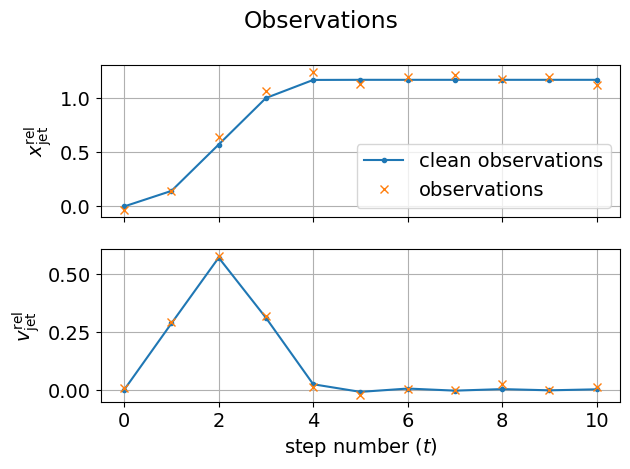

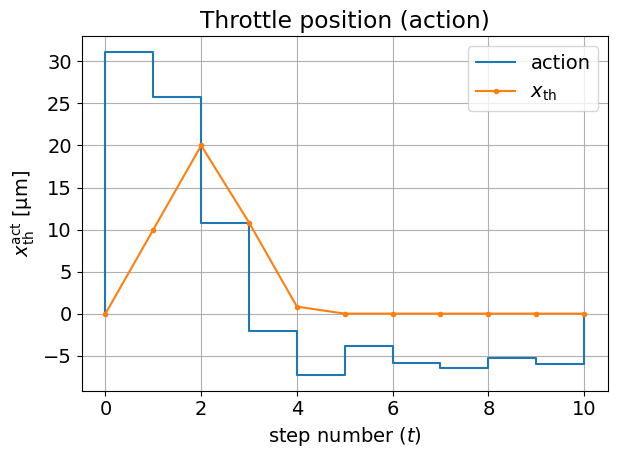


SEED = 14
Total objective: 3.04869
log folder: ./data/2024-03-27_122643_seed_14


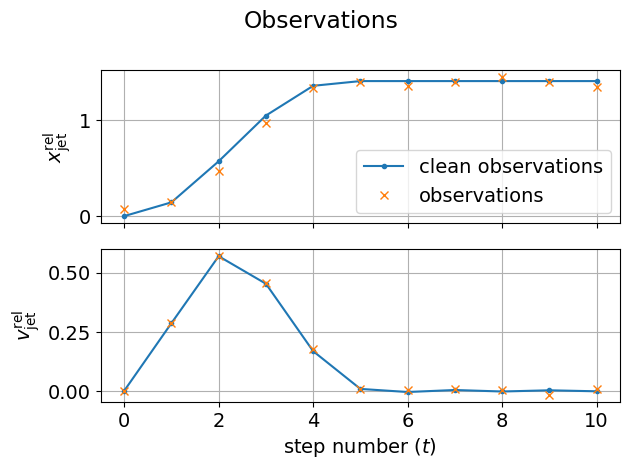

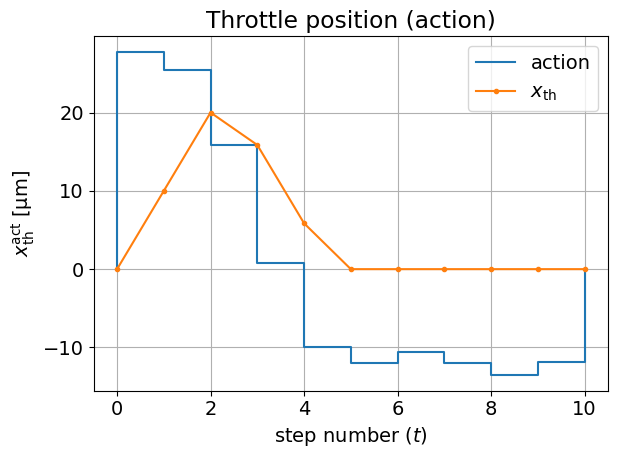

In [2]:
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d_%H%M%S")
print(f'Time start: {dt_string}')

seed_list = list(range(1,15))
print(seed_list)

for SEED in seed_list:
    print()
    print(f'SEED = {SEED}')
    np.random.seed(SEED)
    random.seed(SEED)
    
    system = HydraulicSystem(
        jet_length_std=5e-2,
        jet_velocity_std=1e-2,
    )
    simulator = Simulator(system, N_steps=10, state_init=np.array([1e3, 0]))
    controller = PDController(
        P_coef=30,
        D_coef=0,
    )

    scenario = SimulationScenario(
        simulator=simulator,
        policy=controller,
        root_data_path=data_path,
        seed=SEED,
        dt_string=dt_string
    )

    scenario.run()
    scenario.plot_data()